In [2]:
#imports
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

%matplotlib inline

In [3]:
#loading data

data = ('Shellfishdata_20231127.csv')

df = pd.read_csv(data)

df.head()

,id,date,year,month,state,region,subregion,latitude,longitude,species,...,sample_size,prev,adv_prev,low_prev,w_prev,intensity,scale_notes,addlocinfo,program,sitecode
0,7844,12/7/21,2021,12,NJ,Great Bay,Mullica River,39.554751,-74.463714,American Oyster,...,20,0.25,0.00,0.25,0.000,0.000000,NaN,NJ SHELLFISHERIES,HSRL,FRENCH'S PT
1,7845,12/7/21,2021,12,NJ,Great Bay,Mullica River,39.554751,-74.463714,American Oyster,...,20,0.10,0.05,0.05,0.000,0.000000,NaN,NJ SHELLFISHERIES,HSRL,MOSS PT
2,9531,11/23/21,2021,11,NJ,Delaware Bay,Medium Mortality Market,39.317119,-75.365000,American Oyster,...,20,0.75,0.20,0.55,1.450,1.933333,NaN,NaN,HSRL,Cohansey
3,9331,11/23/21,2021,11,NJ,Delaware Bay,High Mortality,39.247604,-75.251117,American Oyster,...,20,0.95,0.60,0.35,2.625,2.763158,NaN,NaN,HSRL,Bennies Sand
4,9332,11/23/21,2021,11,NJ,Delaware Bay,High Mortality,39.247604,-75.251117,American Oyster,...,20,0.90,0.25,0.65,1.900,2.111111,NaN,NaN,HSRL,Bennies Sand


/Users/tbarry/miniconda3/envs/swbc2023/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


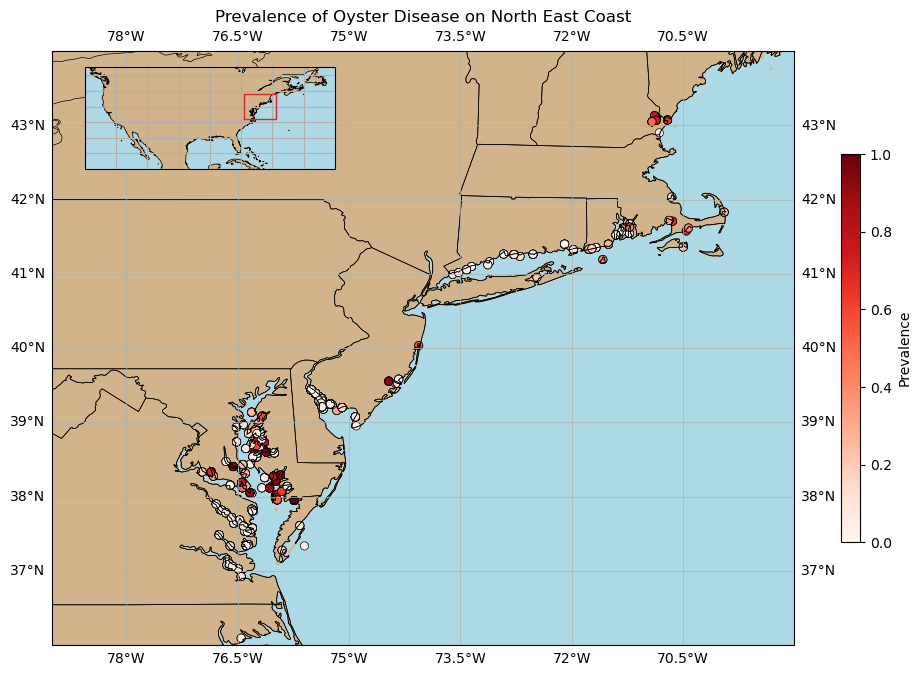

In [22]:
#import cart features
import cartopy.feature as cfeature
import cmocean

# different projection
#fig= plt.figure(figsize = (8,6))
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=45))
#plt.scatter(df.longitude, df.latitude, c = df.prev, edgecolor = 'black', transform = ccrs.PlateCarree(), cmap = 'Reds')

#my map
fig= plt.figure(figsize = (10,10))
extent = [-79, -69, 36, 44]
ax = plt.axes(projection = ccrs.PlateCarree())
plt.scatter(df.longitude, df.latitude, c = df.prev, linewidth=0.5, s=35, edgecolor = 'black', transform = ccrs.PlateCarree(), cmap = 'Reds')

ax.gridlines(draw_labels = True, linewidth=0.5)
ax.coastlines(resolution = '10m',linewidth=0.5)
ax.set_extent(extent)

ax.add_feature(cfeature.STATES,linewidth = 0.5)
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND, color= 'tan')

#colorbar
plt.colorbar(label = 'Prevalence', shrink = 0.4)
ax.set_title('Prevalence of Oyster Disease on North East Coast')
fig.tight_layout()

#subplot for context
##lat and long of subplot
sub_extent = [-130, -50, 20, 45]
##size and location of subplot
sub_ax = fig.add_axes([0.09, 0.63, 0.25, 0.2],projection=ccrs.PlateCarree())

sub_ax.plot([-79, -79, -69, -69, -79] , [ 36, 44, 44, 36, 36 ], color='tab:red',linewidth=1,  transform=ccrs.PlateCarree(), zorder=100 )
sub_ax.set_global() 
LAND = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='face',color='tan')
sub_ax.set_facecolor('lightblue')
sub_ax.add_feature(LAND, zorder=0)
sub_ax.coastlines(resolution = '50m',linewidth=0.5)
sub_ax.gridlines(linewidths=.5)
sub_ax.set_extent(sub_extent)

In [6]:
#stats stuff for oyster data
data = ('Shellfishdata_20231127.csv')

df = pd.read_csv(data)

df.head()

#groupby year 
gb = df.groupby('year')
groups = gb.groups
groups.keys()

state = df.groupby ('state')


In [199]:
#mean prevalence for each year
gb.prev.aggregate(np.mean).head()


/var/folders/7l/_lps056x5lg14pl0j8952y0h0000gn/T/ipykernel_80834/2504313792.py:2: FutureWarning: The provided callable <function mean at 0x10fec7ba0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  gb.prev.aggregate(np.mean).head()


year
2012    0.509722
2013    0.276997
2014    0.302588
2015    0.357209
2016    0.424254
Name: prev, dtype: float64

In [200]:
#mean prevalence for each state
state.prev.aggregate(np.mean).head()


/var/folders/7l/_lps056x5lg14pl0j8952y0h0000gn/T/ipykernel_80834/588921243.py:2: FutureWarning: The provided callable <function mean at 0x10fec7ba0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  state.prev.aggregate(np.mean).head()


state
CT    0.400202
DE    0.390375
FL    0.466667
LA    0.175000
MA    0.231964
Name: prev, dtype: float64